In [36]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
con = sqlite3.connect("database/db.sqlite")
cur = con.cursor()

In [38]:
res = cur.execute("SELECT * FROM float")
names = list(map(lambda x: x[0], cur.description))
values = res.fetchall()
values = pd.DataFrame(values,columns=names)
res = cur.execute("SELECT * FROM ea_optimizer_generation")
names = list(map(lambda x: x[0], cur.description))
generation = res.fetchall()
generation = pd.DataFrame(generation,columns=names)
res = cur.execute("SELECT * FROM ea_optimizer_individual")
names = list(map(lambda x: x[0], cur.description))
individual = res.fetchall()
individual = pd.DataFrame(individual,columns=names)

In [39]:
full.columns

Index(['ea_optimizer_idl', 'generation_index', 'individual_index',
       'pop_diversity', 'pool_diversity', 'dominated_quality_youth',
       'fullydominated_quality_youth', 'age', 'inverse_age',
       'seasonal_dominated', 'seasonal_fullydominated', 'backforth_dominated',
       'forthright_dominated', 'diversity', 'ea_optimizer_id', 'genotype_id',
       'states_id', 'birth', 'speed_y', 'speed_x', 'relative_speed_y',
       'displacement', 'average_z', 'head_balance', 'modules_count',
       'hinge_count', 'brick_count', 'bone_count', 'bone_size_sum',
       'hinge_prop', 'brick_prop', 'branching_count', 'branching_prop',
       'extremities', 'extensiveness', 'extremities_prop',
       'extensiveness_prop', 'width', 'height', 'coverage', 'proportion',
       'symmetry', 'hinge_ratio'],
      dtype='object')

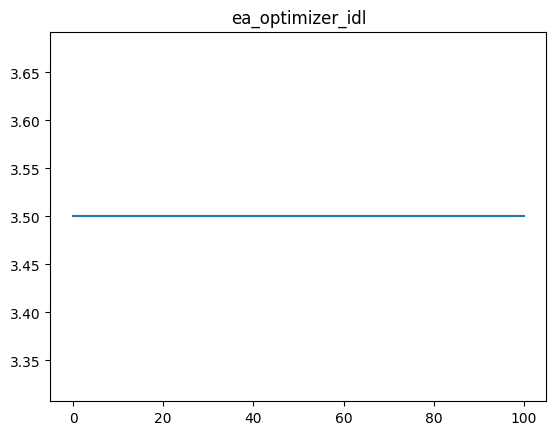

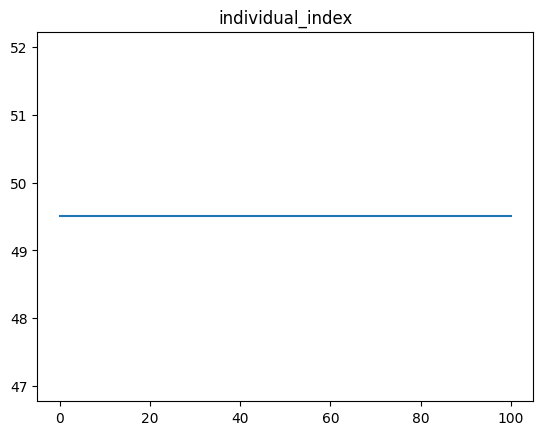

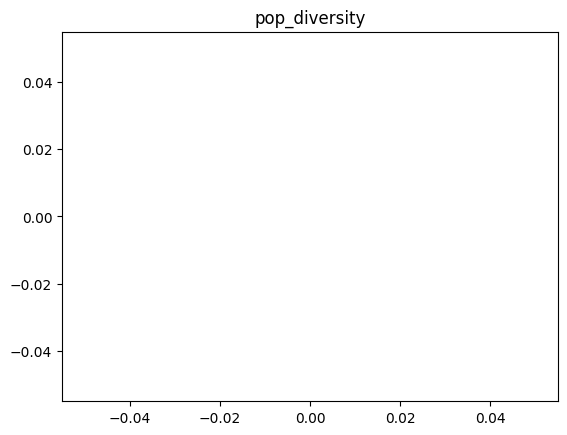

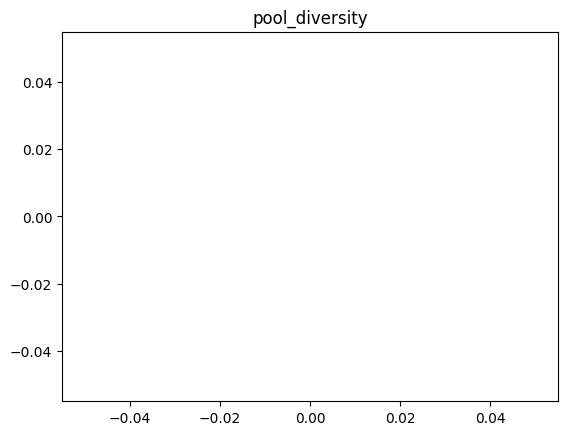

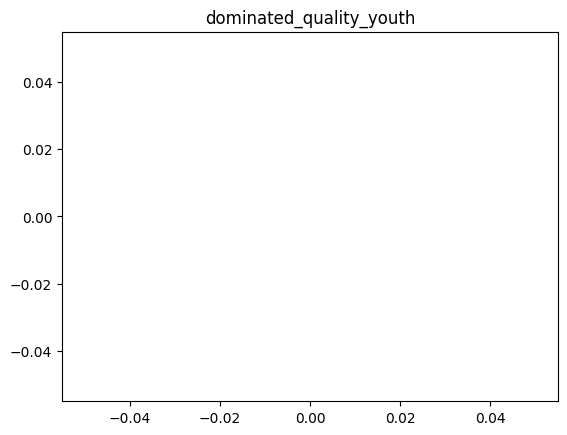

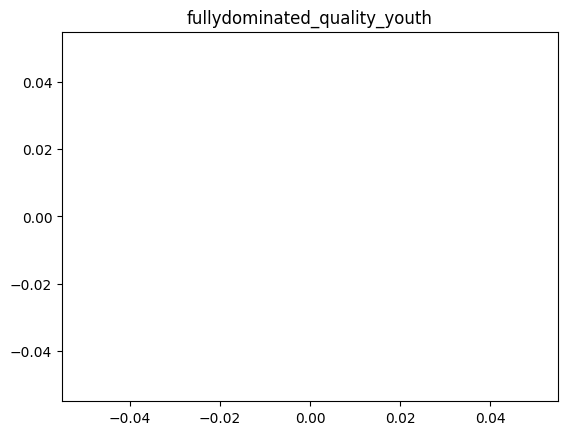

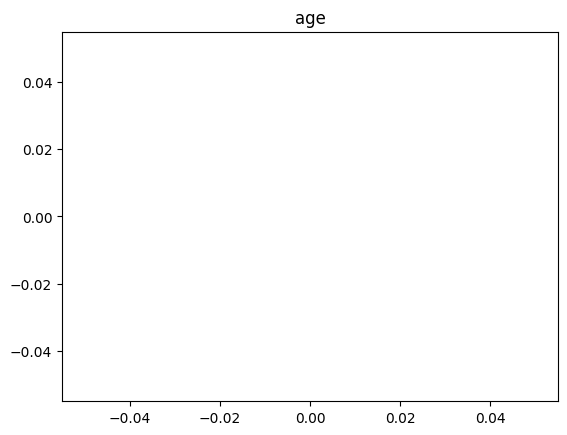

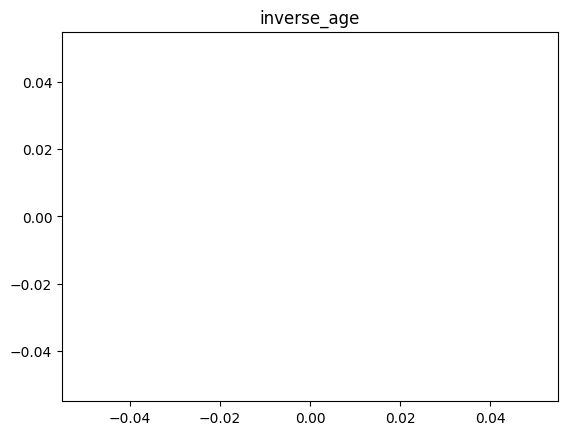

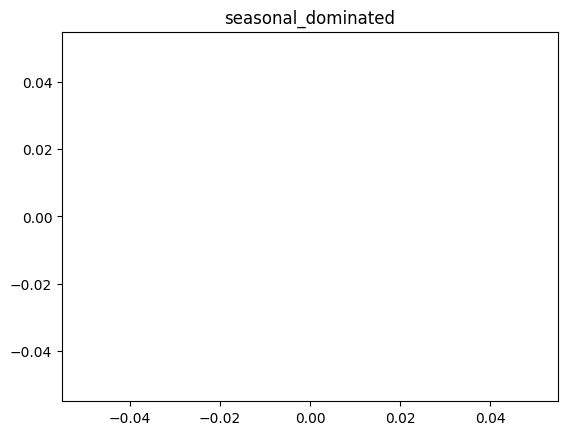

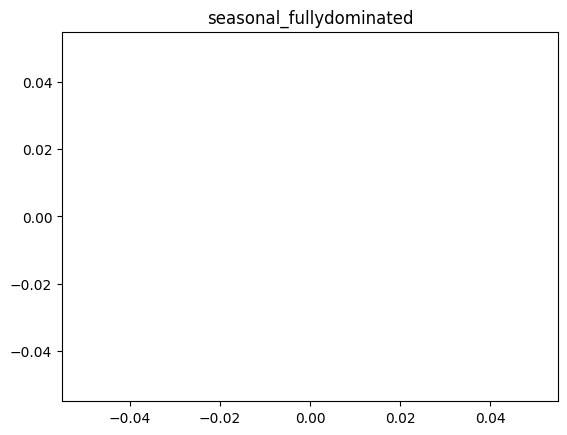

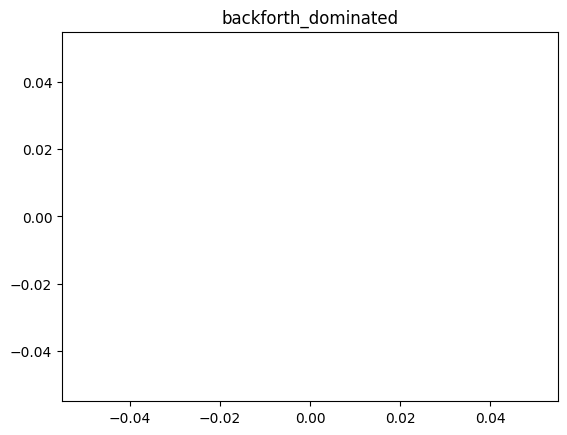

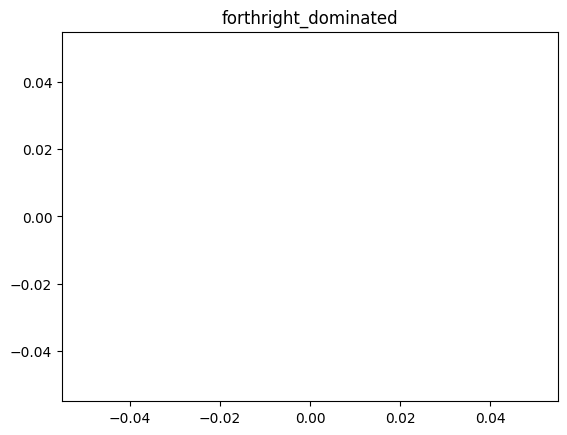

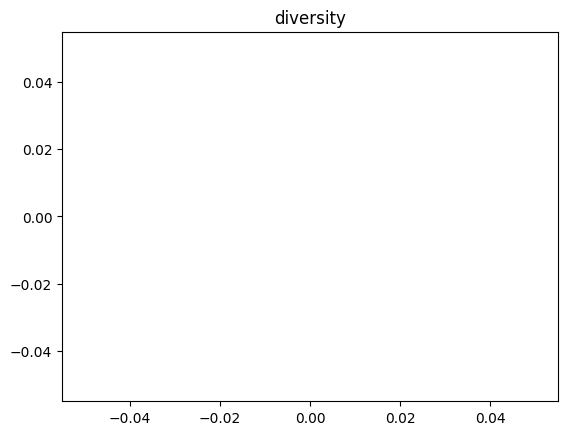

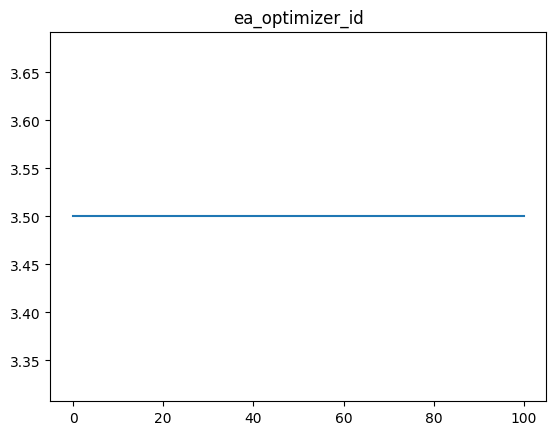

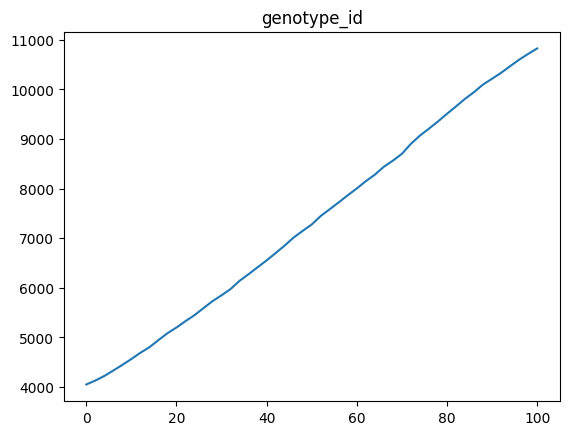

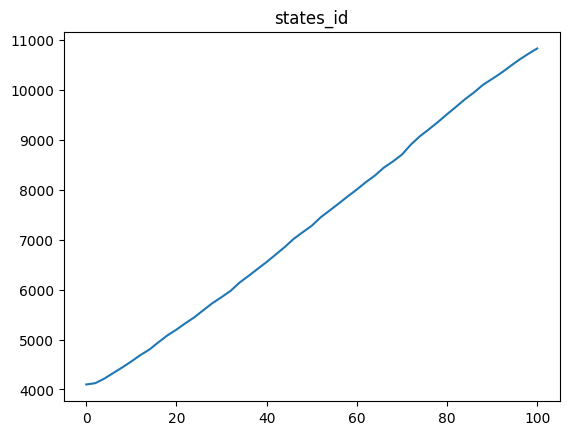

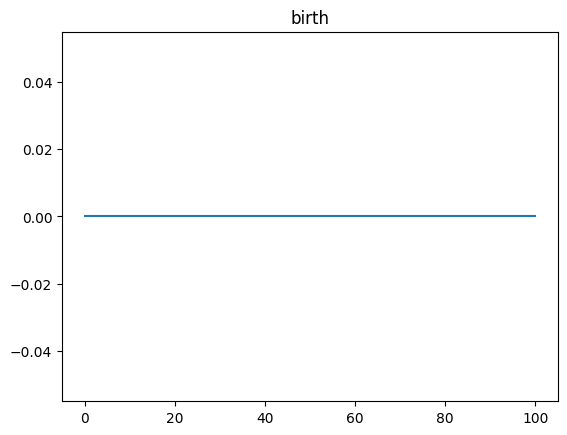

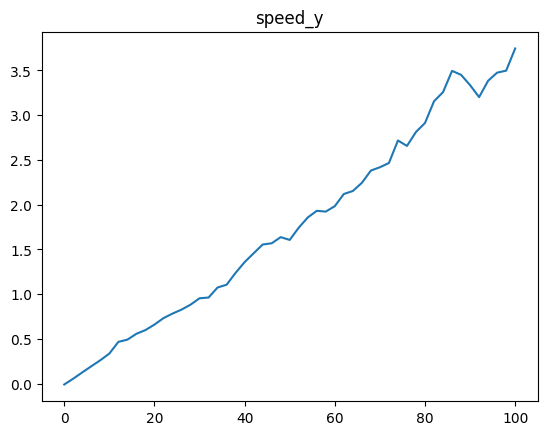

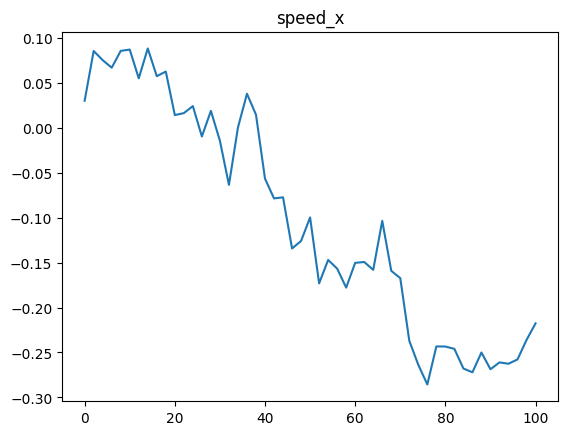

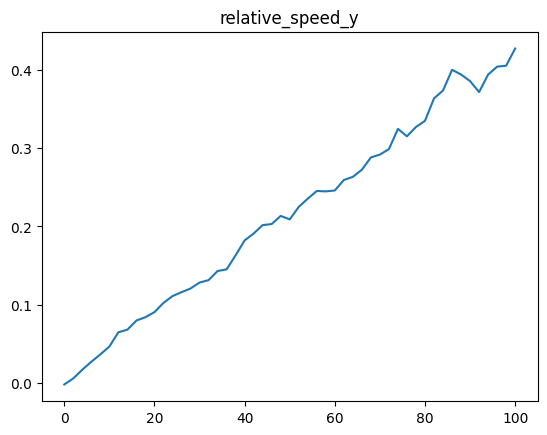

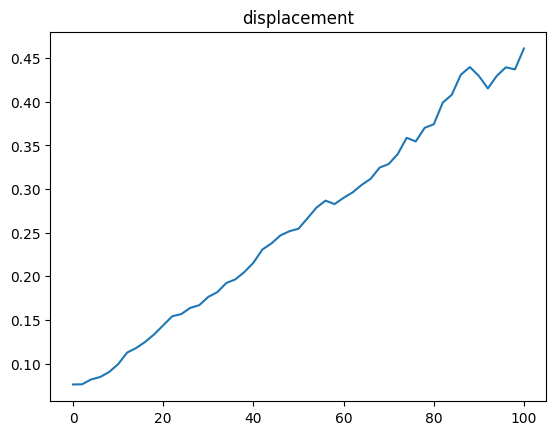

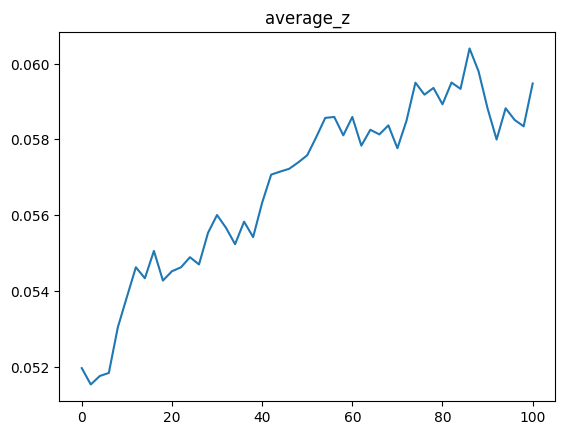

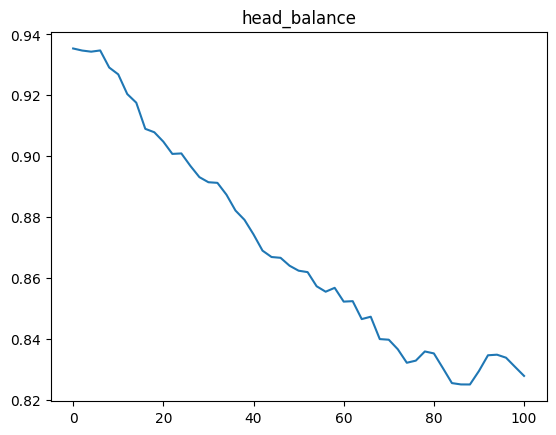

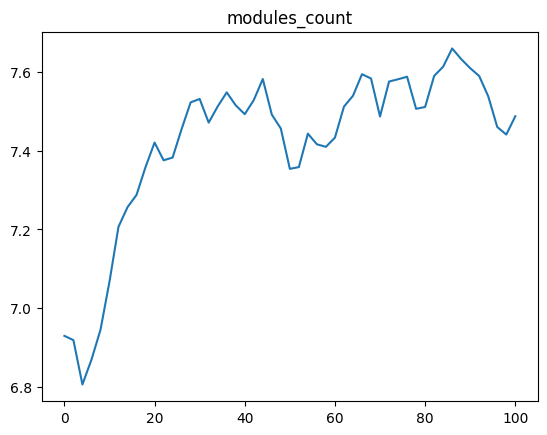

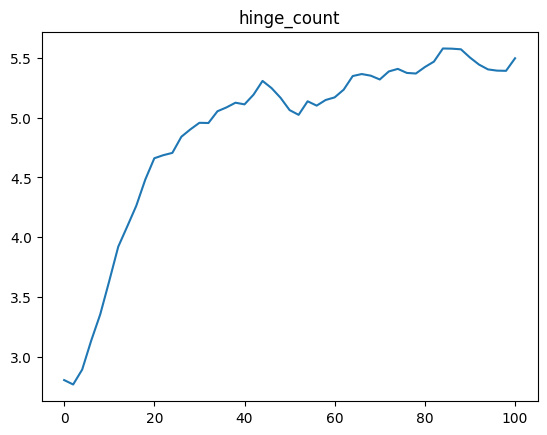

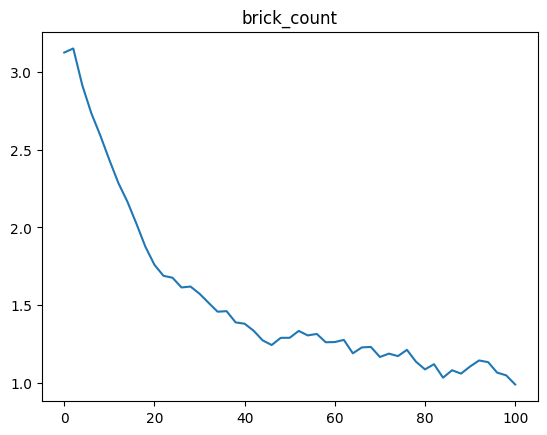

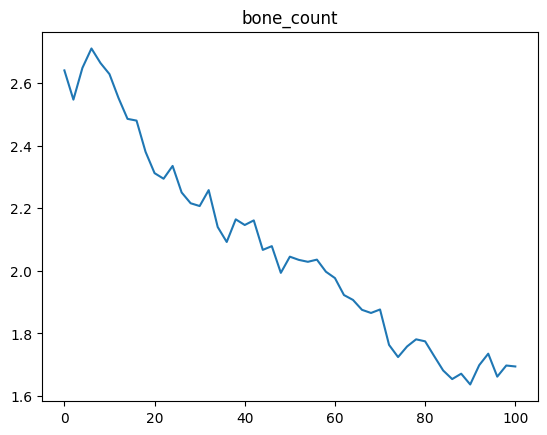

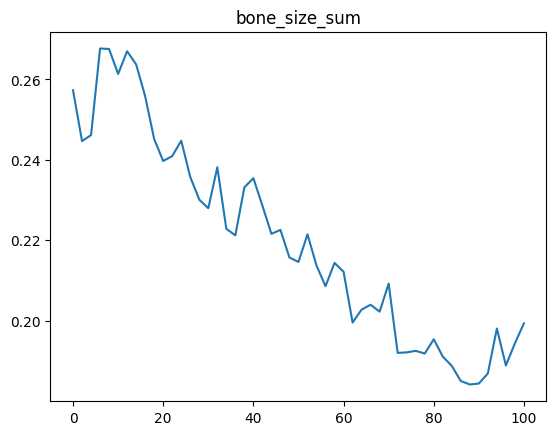

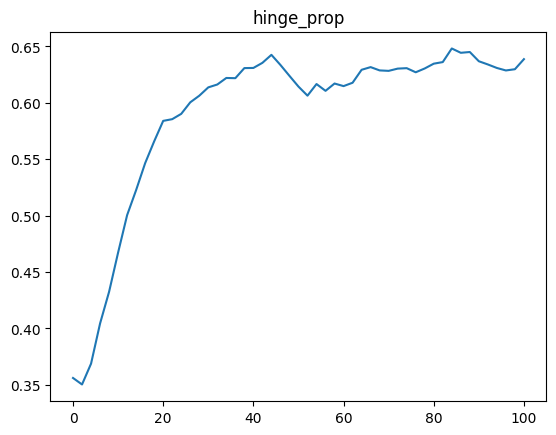

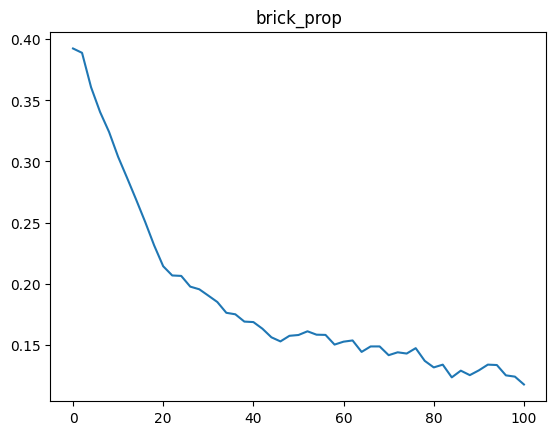

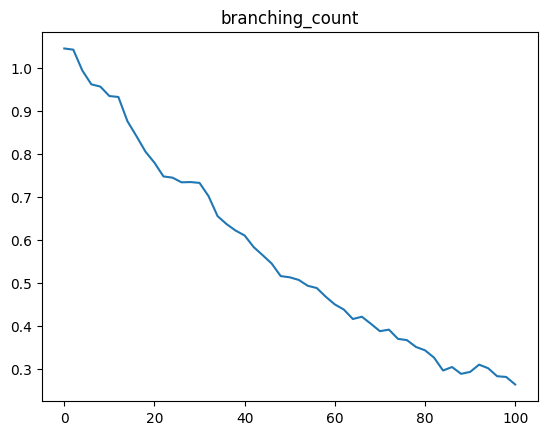

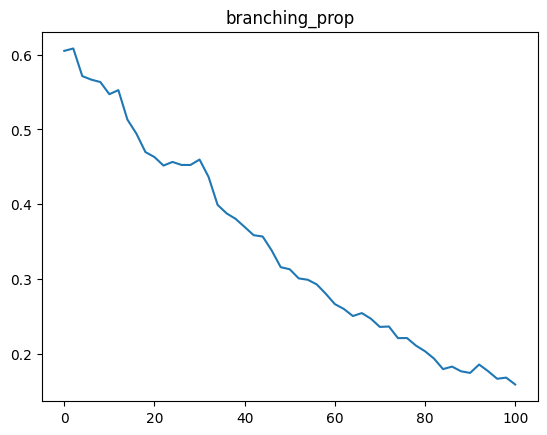

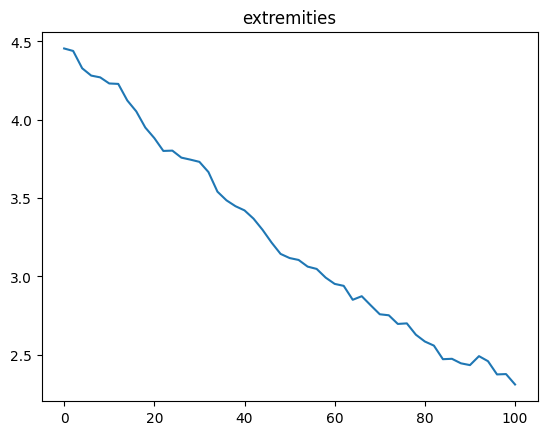

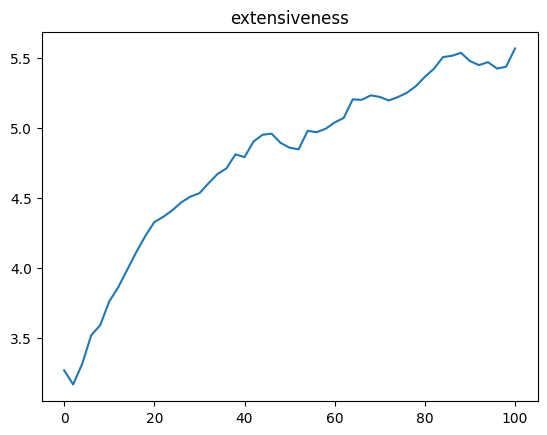

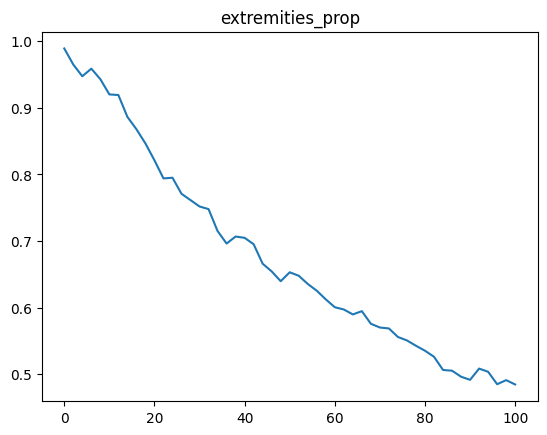

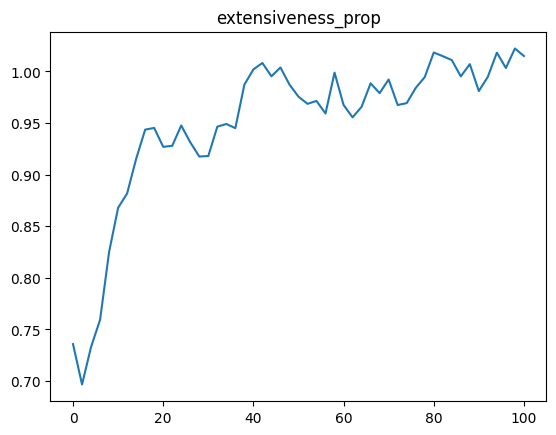

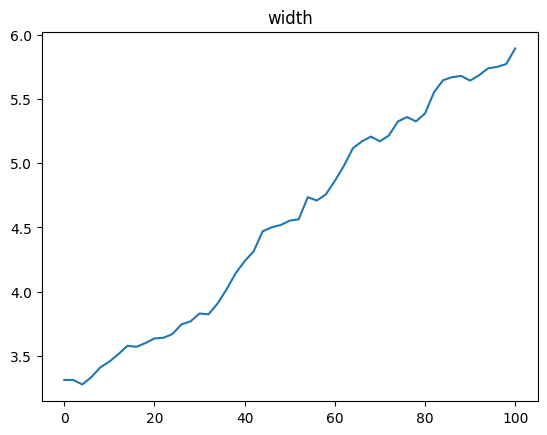

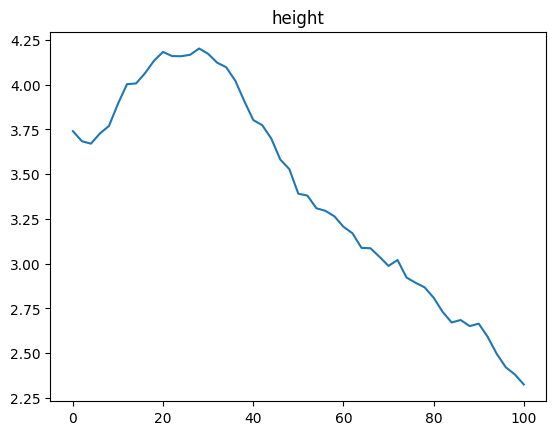

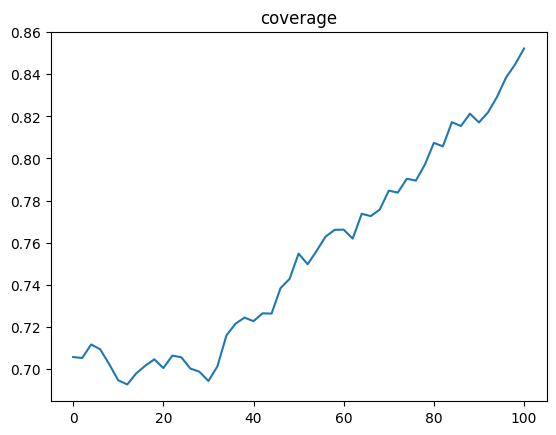

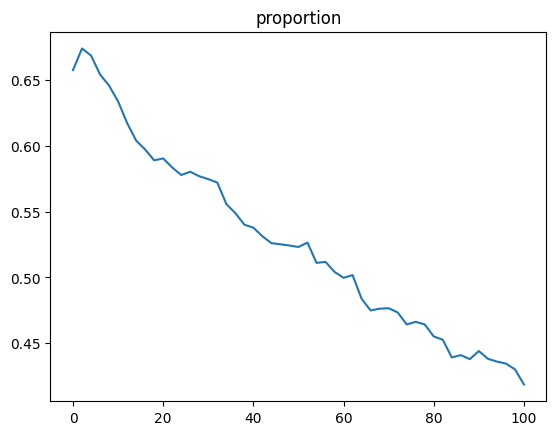

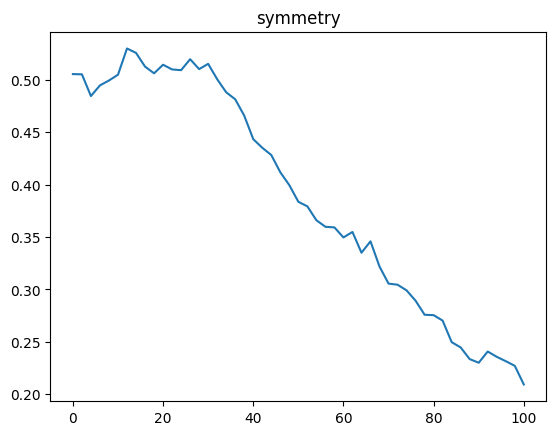

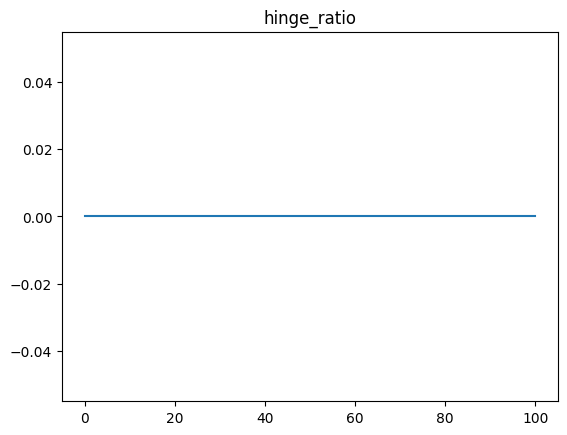

In [40]:
fmix = generation.set_index('individual_id').join(individual.set_index('individual_id'),lsuffix='l')
full = fmix.set_index('float_id').join(values.set_index('id'))
#measure = 'height'
for i in full.columns:
    try:
        plot_data = full[['generation_index',i]].groupby(['generation_index']).mean()
        plt.plot(plot_data.index,plot_data[i])
        plt.title(i)
        #plt.title = i
        #plt.show()
        plt.savefig('plots/'+i+'.png')
        plt.show()
    except:
        continue

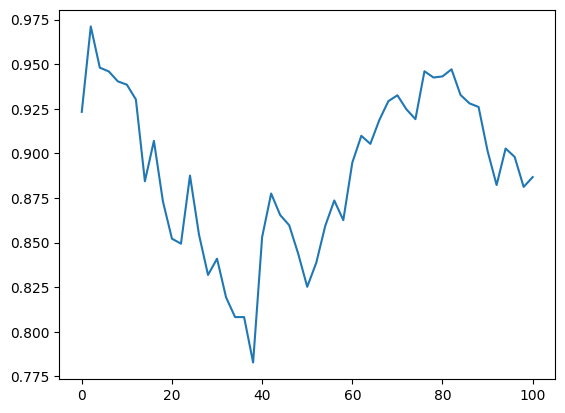

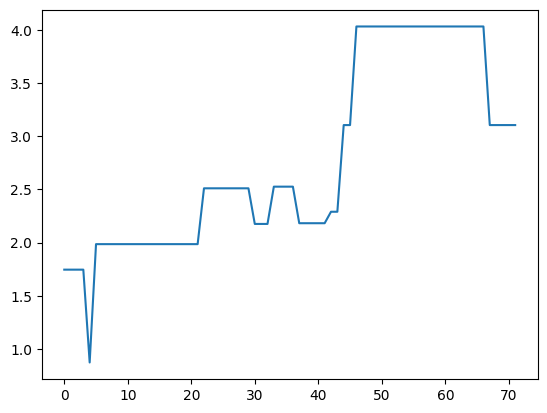

In [54]:
plot_data = full[['generation_index','value']].groupby(['generation_index']).max()
plt.plot(plot_data.index,plot_data['value'])